## <h1><center>Predictive model using Comparative Analysis of Correlated effects Socio-economic Facors play in Relation to Life Expectancy  </center></h1>

#### Table of contents :
* [Context](#Context)
* [Method](#Method)
* [Data-Exploration](#Data-Exploration)
  * [Figure-1](#Figure-1)
  * [Figure-2](#Figure-2)
  * [Figure-3](#Figure-3)
  * [Figure-4](#Figure-4)
  * [Figure-5](#Figure-5)
* [Exploration-Overview](#Exploration-Overview)
* [Data-Preprocessing](#Data-Preprocessing)
* [Model](#Model)
* [Conclusons](#Conclusions)

#### <h1><center> Context </center></h1>

Understanding the factors that contribute to a long and healthy life can yield invaluable insights and guide policy decisions effectively. For instance, if research reveals that disease is a more significant detriment to life expectancy compared to nutrition, public health efforts can be reoriented to prioritize disease prevention and treatment. Similarly, if a strong correlation is found between high CO2 emissions and shorter life spans, this could prompt societal and governmental actions to reduce carbon output, potentially leading to both improved public health and environmental benefits. Furthermore, uncovering a link between corruption levels and life expectancy might incentivize leaders to combat corruption more vigorously, recognizing that reducing corruption could directly enhance the standard of living and overall well-being of their populations. These insights not only help in formulating targeted interventions but also in mobilizing resources and public support towards the most impactful areas, ultimately fostering healthier and longer lives for communities worldwide.

#### <h1><center> Method </center></h1>

Utilizing Python and a variety of libraries to perform a comprehensive analysis of the correlaions between CO2 and corruption respectively to life expectancy. By incorporating graphs, heatmaps, and tabular data, I will visualize my data to facilitate a thorough and intuitive analysis. Then build predictive models for life expectancy under various circumstances of data availbility; Implementing methods such as random forest trees, linear regression, and stochastic gradient descent.

To evaluate the statistical significance of my findings, I will conduct a Z-test, which will provide a Z-score and p-value. These metrics will be crucial in communicating the strength of the evidence against the null hypothesis. I'll also use the mean squared error and root mean squared error to review accuracy.

The techniques and tools mentioned above are well-established methods for conducting exploratory data analysis. Utilizing the p-value will enable me to validate my hypothesis, offering strong (or weak) evidence in relation to the null hypothesis. This multifaceted approach will ensure a robust and insightful analysis, enhancing the reliability and clarity of my conclusions.

#### <h1><center> Data-Exploration </center></h1>

In [3]:
!pip install -U scikit-learn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats


In [4]:
df = pd.read_csv('/life_expectancy.csv')

In [5]:
df.head(5)

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.0,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.0,7.139524,3.4587,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.0,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.0,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70


In [6]:
df.shape

(3306, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    3306 non-null   object 
 1   Country Code                    3306 non-null   object 
 2   Region                          3306 non-null   object 
 3   IncomeGroup                     3306 non-null   object 
 4   Year                            3306 non-null   int64  
 5   Life Expectancy World Bank      3118 non-null   float64
 6   Prevelance of Undernourishment  2622 non-null   float64
 7   CO2                             3154 non-null   float64
 8   Health Expenditure %            3126 non-null   float64
 9   Education Expenditure %         2216 non-null   float64
 10  Unemployment                    3002 non-null   float64
 11  Corruption                      975 non-null    float64
 12  Sanitation                      20

### <h2> Figure-1 </h2>

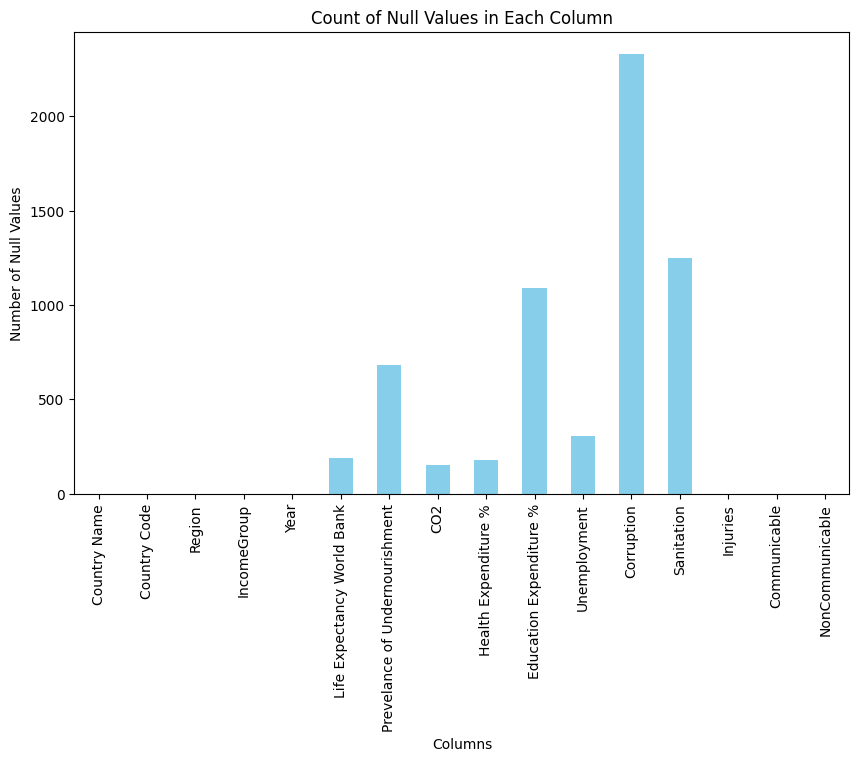

In [8]:
null_counts = df.isnull().sum()
null_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Count of Null Values in Each Column')
plt.ylabel('Number of Null Values')
plt.xlabel('Columns')
plt.show()

### <h2> Figure-2 </h2>

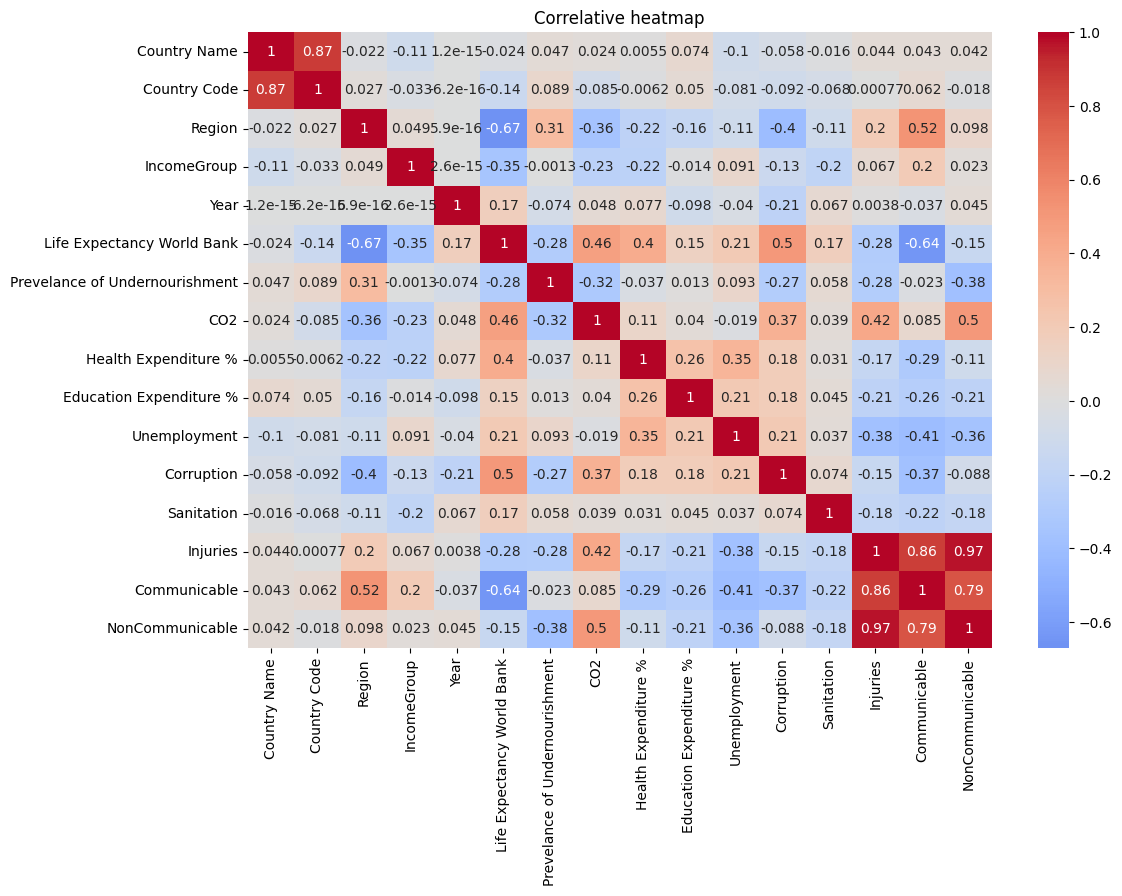

In [9]:
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

# Correlation matrix
corr_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlative heatmap')
plt.show()

### <h2> Figure-3 </h2>

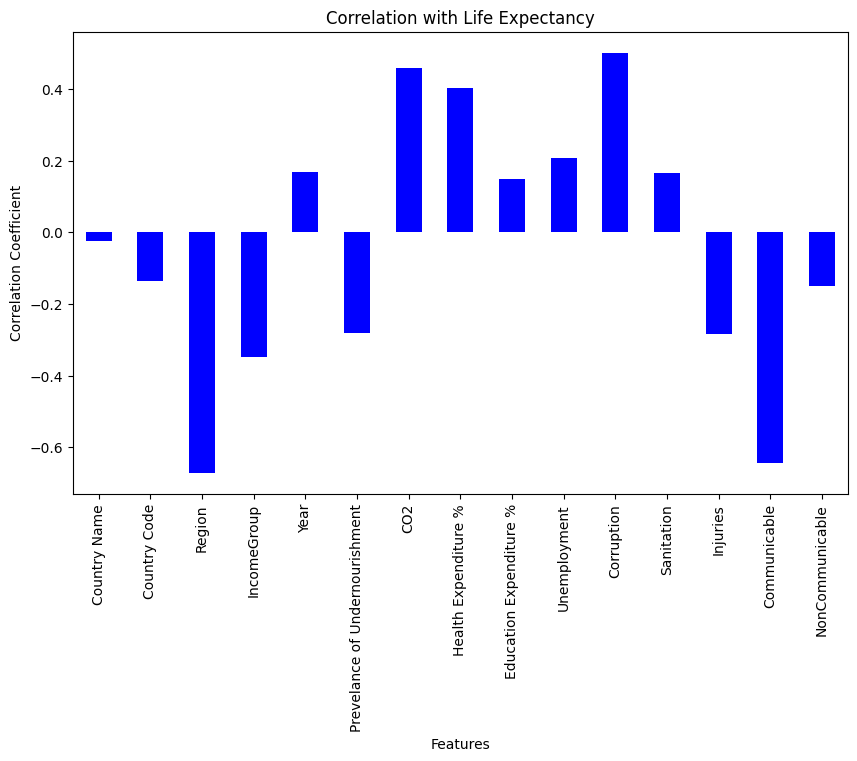

In [10]:

# Correlation with the target variable
target_corr = df_encoded.corr()['Life Expectancy World Bank'].drop('Life Expectancy World Bank')

# Plotting the bar plot
target_corr.plot(kind='bar', figsize=(10, 6), color='Blue')
plt.title('Correlation with Life Expectancy')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

### <h2> Figure-4 </h2>

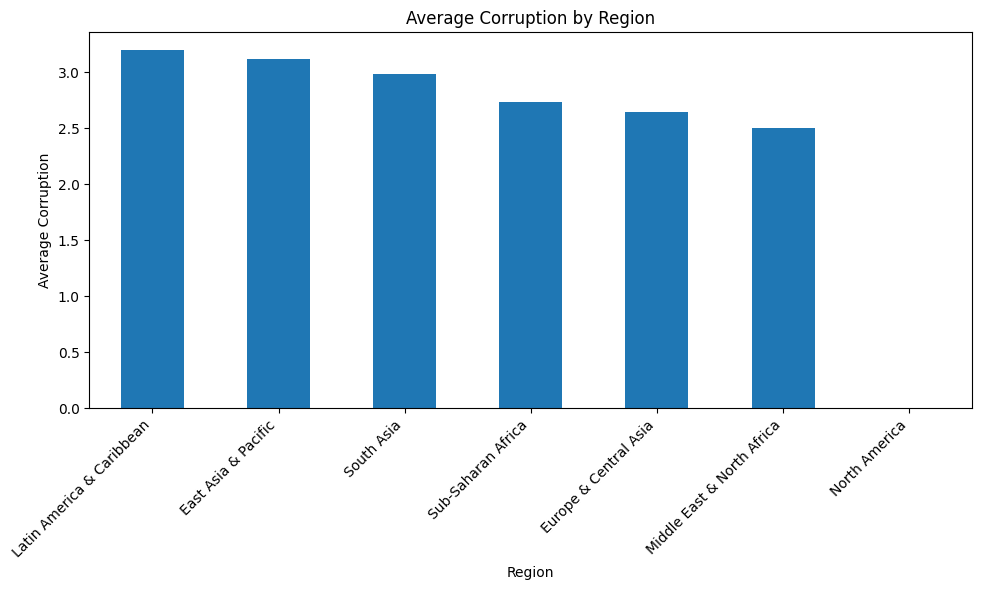

In [11]:
# Group the data by region and calculate the mean corruption for each region
region_corruption = df.groupby('Region')['Corruption'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
region_corruption.plot(kind='bar')
plt.title('Average Corruption by Region')
plt.xlabel('Region')
plt.ylabel('Average Corruption')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### <h2> Figure-5 </h2>

<ipython-input-12-18a6090217bd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Life Expectancy World Bank', y='Region', inner='box', palette='Dark2')


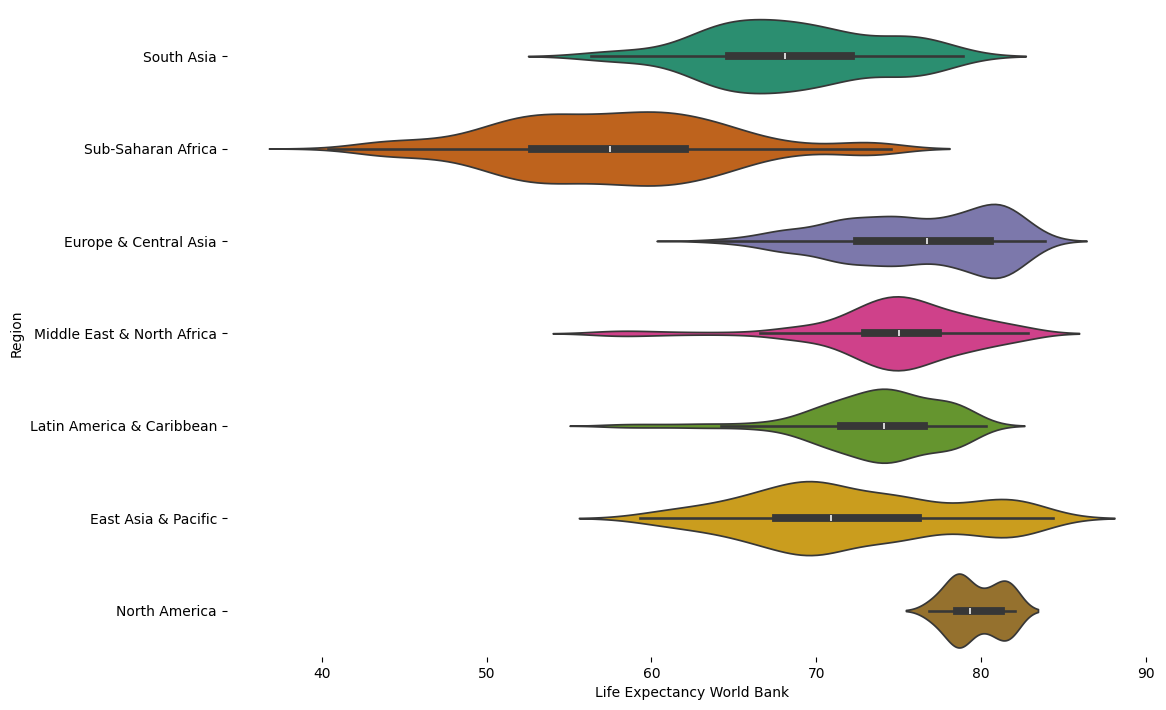

In [12]:

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Life Expectancy World Bank', y='Region', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

#### <h1><center> Exploration-Overview </center></h1>

Okay lets review a bit of our exploratory thought process here. We first peered into our data to get a sense of the shape, types, and amount of data. This gives us an idea of the volume of our data, making planning for our transformation phase smoother. Looking at [Figure-1](#Figure-1), we see that our data has a large amount of null values(missing data). Especially in the Corruption column which will definitely affect the accuracy of our model. The lack of completeness in the data cannot be helped due to so many countries avoiding reporting their countries corruption data as not to draw public attention to the issue. [Figure-2](#Figure-2) stands out visually, but the heatmap is simply used to highlight correlations between variables using the Pearson correlation coeffiecnt which is used to measure linear relations bewteen two sets of data. Here, we're using the heatmap to visualize every columns linear correlative relation to one another between the ranges of -1 and 1. Corruption, CO2, and Health Expenditure % stand out as the top 3 for largest correlative affect on life expectancy. The heatmap shows all other correlation coeffecents as well providing deeper insights into the data such as higher sanitation having positive correlation to life expectancy, but negatively correlates with communicable diseases. [Figure-3](#Figure-3), like Figure-2 displays the correlative coeffecent in relation to life expectancy; the difference in the two lays in Figure-3 being exclusive in its display for life expectancy. Figure-3 also visualizes which features correlate postitively vs. negatively in a much more straight forward manner using a double side bar chart. Figure's 4 & 5 display the distribution of CO2 and Corruption across the 7 regions of the world. Note([Figure-4](#Figure-4)) the reduced amount of CO2 in Sub-Suharan Africa(Region 6) compared to other regions, as well as the low amount of corruption([Figure-5](#Figure-5)) in North America(Region 4)

#### <h1><center> Data-Preprocessing </center></h1>

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error


# Example for encoding categorical columns
categorical_columns = ['Country Name', 'Country Code', 'Region', 'IncomeGroup']
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Separate complete and missing data
df_complete = df.dropna(subset=['Corruption'])
df_missing = df[df['Corruption'].isnull()]

# Feature and target separation for complete data
X_complete = df_complete.drop('Corruption', axis=1)
y_complete = df_complete['Corruption']

# Encode categorical columns in complete data
X_complete_encoded = encoder.fit_transform(X_complete[categorical_columns])
X_complete_encoded = pd.DataFrame(X_complete_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_complete_encoded = X_complete_encoded.join(X_complete.drop(categorical_columns, axis=1).reset_index(drop=True))

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_complete_encoded, y_complete, test_size=0.2, random_state=42)

# Train the model
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Encode categorical columns in missing data
X_missing = df_missing.drop('Corruption', axis=1)
encoder.handle_unknown = 'ignore'
X_missing_encoded = encoder.transform(X_missing[categorical_columns])
X_missing_encoded = pd.DataFrame(X_missing_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_missing_encoded = X_missing_encoded.join(X_missing.drop(categorical_columns, axis=1).reset_index(drop=True))

# Impute missing values
predicted_corruption = model.predict(X_missing_encoded)
df.loc[df['Corruption'].isnull(), 'Corruption'] = predicted_corruption

print(df)

Mean Squared Error: 0.03975517535222164
              Country Name Country Code                      Region  \
0              Afghanistan          AFG                  South Asia   
1                   Angola          AGO          Sub-Saharan Africa   
2                  Albania          ALB       Europe & Central Asia   
3                  Andorra          AND       Europe & Central Asia   
4     United Arab Emirates          ARE  Middle East & North Africa   
...                    ...          ...                         ...   
3301               Vanuatu          VUT         East Asia & Pacific   
3302                 Samoa          WSM         East Asia & Pacific   
3303          South Africa          ZAF          Sub-Saharan Africa   
3304                Zambia          ZMB          Sub-Saharan Africa   
3305              Zimbabwe          ZWE          Sub-Saharan Africa   

              IncomeGroup  Year  Life Expectancy World Bank  \
0              Low income  2001             

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [14]:
categorical_columns = ['Country Name', 'Country Code', 'Region', 'IncomeGroup']
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Separate complete and missing data
df_complete = df.dropna(subset=['Life Expectancy World Bank'])
df_missing = df[df['Life Expectancy World Bank'].isnull()]

# Feature and target separation for complete data
X_complete = df_complete.drop('Life Expectancy World Bank', axis=1)
y_complete = df_complete['Life Expectancy World Bank']

# Encode categorical columns in complete data
X_complete_encoded = encoder.fit_transform(X_complete[categorical_columns])
X_complete_encoded = pd.DataFrame(X_complete_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_complete_encoded = X_complete_encoded.join(X_complete.drop(categorical_columns, axis=1).reset_index(drop=True))

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_complete_encoded, y_complete, test_size=0.2, random_state=42)

# Train the model
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Encode categorical columns in missing data
X_missing = df_missing.drop('Life Expectancy World Bank', axis=1)
encoder.handle_unknown = 'ignore'
X_missing_encoded = encoder.transform(X_missing[categorical_columns])
X_missing_encoded = pd.DataFrame(X_missing_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_missing_encoded = X_missing_encoded.join(X_missing.drop(categorical_columns, axis=1).reset_index(drop=True))

# Impute missing values
predicted_life = model.predict(X_missing_encoded)
df.loc[df['Life Expectancy World Bank'].isnull(), 'Life Expectancy World Bank'] = predicted_life

print(df)

Mean Squared Error: 0.9532209457565961
              Country Name Country Code                      Region  \
0              Afghanistan          AFG                  South Asia   
1                   Angola          AGO          Sub-Saharan Africa   
2                  Albania          ALB       Europe & Central Asia   
3                  Andorra          AND       Europe & Central Asia   
4     United Arab Emirates          ARE  Middle East & North Africa   
...                    ...          ...                         ...   
3301               Vanuatu          VUT         East Asia & Pacific   
3302                 Samoa          WSM         East Asia & Pacific   
3303          South Africa          ZAF          Sub-Saharan Africa   
3304                Zambia          ZMB          Sub-Saharan Africa   
3305              Zimbabwe          ZWE          Sub-Saharan Africa   

              IncomeGroup  Year  Life Expectancy World Bank  \
0              Low income  2001              

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [15]:
df.head(10)

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308000,47.8,730.0,NaN,NaN,10.809000,2.014876,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059000,67.5,15960.0,4.483516,NaN,4.004000,2.418762,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288000,4.9,3230.0,7.139524,3.45870,18.575001,2.751864,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,72.852377,NaN,520.0,5.865939,NaN,NaN,3.581884,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544000,2.8,97200.0,2.484370,NaN,2.493000,2.848949,NaN,144678.14,65271.91,481740.70
5,Argentina,ARG,Latin America & Caribbean,Upper middle income,2001,73.755000,3.0,125260.0,8.371798,4.83374,17.320000,2.433364,48.053996,1397676.07,1507068.98,8070909.52
6,Armenia,ARM,Europe & Central Asia,Upper middle income,2001,71.800000,26.1,3600.0,4.645627,2.46944,10.912000,2.692826,46.351896,103371.75,122238.13,767916.19
7,American Samoa,ASM,East Asia & Pacific,Upper middle income,2001,74.857150,NaN,NaN,NaN,NaN,NaN,3.283308,NaN,1683.98,2933.98,10752.13
8,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,2001,74.171000,NaN,350.0,5.435876,NaN,NaN,3.892019,NaN,2201.12,3279.72,14289.69
9,Australia,AUS,East Asia & Pacific,High income,2001,79.634146,2.5,345640.0,7.696229,NaN,6.740000,3.084374,58.788894,612233.81,208282.73,4158052.86


In [16]:
from sklearn.preprocessing import MinMaxScaler

MinScaler = MinMaxScaler()

Numeric_Cats = ['Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2', 'Health Expenditure %', 'Education Expenditure %', 'Unemployment', 'Corruption', 'Sanitation', 'Injuries', 'Communicable', 'NonCommunicable']

df[Numeric_Cats] = MinScaler.fit_transform(df[Numeric_Cats])


In [17]:
df.head(10)

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,0.362354,0.662281,0.000067,NaN,NaN,0.288264,0.289965,NaN,0.039170,0.036077,0.017844
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,0.152089,0.950292,0.001490,0.140198,NaN,0.105087,0.405361,NaN,0.025013,0.041666,0.008197
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,0.771108,0.035088,0.000301,0.255842,0.116343,0.497308,0.500533,0.390722,0.002097,0.000523,0.001632
3,Andorra,AND,Europe & Central Asia,High income,2001,0.738471,NaN,0.000048,0.200389,NaN,NaN,0.737681,0.198838,0.000023,0.000001,0.000034
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,0.776928,0.004386,0.009077,0.053154,NaN,0.064415,0.528271,NaN,0.002593,0.000242,0.001476
5,Argentina,ARG,Latin America & Caribbean,Upper middle income,2001,0.758991,0.007310,0.011698,0.309496,0.177675,0.463526,0.409533,0.467888,0.025114,0.005610,0.024854
6,Armenia,ARM,Europe & Central Asia,Upper middle income,2001,0.714546,0.345029,0.000335,0.147256,0.072219,0.291036,0.483664,0.450453,0.001850,0.000454,0.002358
7,American Samoa,ASM,East Asia & Pacific,Upper middle income,2001,0.784047,NaN,NaN,NaN,NaN,NaN,0.652374,NaN,0.000023,0.000010,0.000025
8,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,2001,0.768448,NaN,0.000032,0.181664,NaN,NaN,0.826291,NaN,0.000032,0.000011,0.000036
9,Australia,AUS,East Asia & Pacific,High income,2001,0.892646,0.000000,0.032280,0.280081,NaN,0.178735,0.595536,0.577852,0.010996,0.000774,0.012801


In [18]:
df = df.drop(['Country Name', 'Country Code'], axis=1)

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and you want to encode these features:
categorical_features = ['IncomeGroup', 'Region', 'Year']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical feature
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])


In [20]:
df1 = df
df2 = df
df3 = df

In [21]:
df.head()

,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,5,1,0,0.362354,0.662281,0.000067,NaN,NaN,0.288264,0.289965,NaN,0.039170,0.036077,0.017844
1,6,2,0,0.152089,0.950292,0.001490,0.140198,NaN,0.105087,0.405361,NaN,0.025013,0.041666,0.008197
2,1,3,0,0.771108,0.035088,0.000301,0.255842,0.116343,0.497308,0.500533,0.390722,0.002097,0.000523,0.001632
3,1,0,0,0.738471,NaN,0.000048,0.200389,NaN,NaN,0.737681,0.198838,0.000023,0.000001,0.000034
4,3,0,0,0.776928,0.004386,0.009077,0.053154,NaN,0.064415,0.528271,NaN,0.002593,0.000242,0.001476


#### <h1><center> Model </center></h1>

In [22]:
colss = ['Life Expectancy World Bank', 'Region']
df1['Life Expectancy World Bank'].fillna(df1['Life Expectancy World Bank'].mean(), inplace=True)
# Assuming 'df' is your DataFrame and 'Life Expectancy World Bank' is your target variable
# Select features and target variable
features = df1.drop(colss, axis=1)  # Replace with your actual feature columns
target = df1['Life Expectancy World Bank']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.0005252407249083814
Root Mean Squared Error: 0.022918130920918954
R-squared: 0.9892698773031982


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [23]:
residuals = y_test - y_pred

# Calculate standard deviation of residuals
residual_std = np.std(residuals)

# Calculate z-scores for each prediction
z_scores = residuals / residual_std

# Select a specific prediction to analyze (e.g., the first prediction)
index_to_analyze = 0
z_score = z_scores[index_to_analyze]

# Calculate p-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

print("Z-score for prediction without Corruption data:", z_score)
print("P-value for prediction without Corruption data:", p_value)

Z-score for prediction without Corruption data: 1.5000153737270079
P-value for prediction without Corruption data: 0.1336104202473165


In [24]:
colss = ['Life Expectancy World Bank', 'CO2']
df2['Life Expectancy World Bank'].fillna(df2['Life Expectancy World Bank'].mean(), inplace=True)
# Assuming 'df' is your DataFrame and 'Life Expectancy World Bank' is your target variable
# Select features and target variable
features = df2.drop(colss, axis=1)  # Replace with your actual feature columns
target = df2['Life Expectancy World Bank']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.000670798903712069
Root Mean Squared Error: 0.025899785785061406
R-squared: 0.9862962748310002


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
residuals = y_test - y_pred

# Calculate standard deviation of residuals
residual_std = np.std(residuals)

# Calculate z-scores for each prediction
z_scores = residuals / residual_std

# Select a specific prediction to analyze (e.g., the first prediction)
index_to_analyze = 0
z_score = z_scores[index_to_analyze]

# Calculate p-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

print("Z-score for prediction without CO2 data:", z_score)
print("P-value for prediction without CO2 data:", p_value)

Z-score for prediction without CO2 data: -2.1307579393337597
P-value for prediction without CO2 data: 0.03310908909712795


In [26]:
original_min = MinScaler.data_min_[0]  # Assuming 'Life Expectancy World Bank' was the first feature normalized
original_range = MinScaler.data_range_[0]

# Denormalize the predicted values
denormalized_predictions = y_pred * original_range + original_min
denormalized_original = y_test * original_range + original_min

# Create a DataFrame to store actual and denormalized predicted values
results_df = pd.DataFrame({'Actual Life Expectancy': denormalized_original,
                           'Denormalized Predicted Life Expectancy': denormalized_predictions})

# Optionally, reset the index for better display
results_df = results_df.reset_index(drop=True)

# Display the table
print(results_df)

     Actual Life Expectancy  Denormalized Predicted Life Expectancy
0                 65.863000                               66.530870
1                 64.693000                               65.327730
2                 75.296000                               75.043042
3                 51.682000                               52.210620
4                 79.490244                               79.327073
..                      ...                                     ...
657               70.952000                               71.213513
658               73.082968                               72.972607
659               64.318000                               63.155350
660               42.518000                               45.231540
661               79.738000                               79.168280

[662 rows x 2 columns]


In [27]:
from sklearn.metrics import mean_squared_error, r2_score
df['Life Expectancy World Bank'].fillna(df['Life Expectancy World Bank'].mean(), inplace=True)
# Assuming 'df' is your DataFrame and 'Life Expectancy World Bank' is your target variable
# Select features and target variable
features = df.drop('Life Expectancy World Bank', axis=1)  # Replace with your actual feature columns
target = df['Life Expectancy World Bank']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.0006295027407157278
Root Mean Squared Error: 0.025089893198571567
R-squared: 0.9871399125666979


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [28]:
from scipy import stats
# Calculate residuals (differences between predicted and actual values)
residuals = y_test - y_pred

# Calculate standard deviation of residuals
residual_std = np.std(residuals)

# Calculate z-scores for each prediction
z_scores = residuals / residual_std

# Select a specific prediction to analyze (e.g., the first prediction)
index_to_analyze = 0
z_score = z_scores[index_to_analyze]

# Calculate p-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

print("Z-score for selected prediction:", z_score)
print("P-value for selected prediction:", p_value)

Z-score for selected prediction: -1.324892141410907
P-value for selected prediction: 0.1852069277190762


In [29]:
importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({'Feature': features.columns, 'Importance': importances})

# Sort by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

print(feature_importances_df)

                           Feature  Importance
0                           Region    0.614686
1                      IncomeGroup    0.114367
11                    Communicable    0.059468
3   Prevelance of Undernourishment    0.047330
2                             Year    0.041834
5             Health Expenditure %    0.033354
9                       Sanitation    0.024001
4                              CO2    0.020150
7                     Unemployment    0.015048
12                 NonCommunicable    0.011781
6          Education Expenditure %    0.006806
8                       Corruption    0.006140
10                        Injuries    0.005034


In [32]:

from joblib import Parallel, delayed
import joblib


# Save the model as a pickle in a file
joblib.dump(model, 'Life_expectancy_model.pkl')



['Life_expectancy_model.pkl']

#### <h1><center>Conclusions</center></h1>

While the model demonstrates strong predictive power with a high R-squared value(.987), suggesting it accurately captures the underlying patterns, the statistical significance of specific predictions is questionable. The z-test result(-1.325) and corresponding p-value(.185) indicate that the observed relationship might be due to chance. Despite this, the model's ability to explain a significant portion of the variance in life expectancy highlights its potential practical value. In terms of overall effectiveness, the project successfully identified key factors influencing life expectancy, but further research is needed to establish definitive causal relationships and enhance the statistical robustness of the findings. In conclusion to answer our research question, corruption does not affect life expectancy signifigantly when accounting for other features.